# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Faaris Muda Dwi Nugraha
- **Email:** faarismudadwinugraha@gmail.com / faarismudawork@gmail.com
- **ID Dicoding:** faarismuda

## Menentukan Pertanyaan Bisnis

**1. "Bagaimana performa rata-rata waktu pengiriman di tiap kota pada tahun 2017, dan apakah ada kota dengan waktu pengiriman lebih dari 10 hari yang dapat memperburuk kepuasan pelanggan?"**

- **Specific**: Fokus pada analisis waktu pengiriman di tiap kota pada tahun 2017.
- **Measurable**: Mengukur rata-rata waktu pengiriman dan identifikasi kota dengan waktu pengiriman lebih dari 10 hari.
- **Action-oriented**: Dapat digunakan untuk mengidentifikasi area yang memerlukan perbaikan dalam hal logistik dan pengiriman.
- **Relevant**: Mengoptimalkan waktu pengiriman untuk meningkatkan pengalaman pelanggan dan kepuasan.
- **Time-bound**: Membatasi analisis pada tahun 2017.

**Teknik Analisis Lanjutan**:
- **Geospatial Analysis**: Menganalisis lokasi dan waktu pengiriman.
    - Membuat **heatmap** untuk menunjukkan waktu pengiriman di setiap kota.
    - Menghitung **rata-rata waktu pengiriman** per kota dan mengidentifikasi **outlier**.


**2. "Apa hubungan antara frekuensi pembelian pelanggan dan total pengeluaran mereka di tahun 2017, dan bagaimana pola ini memengaruhi segmentasi pelanggan yang paling menguntungkan?"**

- **Specific**: Fokus pada analisis frekuensi pembelian dan total pengeluaran pelanggan di tahun 2017.
- **Measurable**: Menghitung frekuensi pembelian dan total pengeluaran pelanggan.
- **Action-oriented**: Membantu dalam membuat strategi pemasaran yang ditujukan untuk segmen pelanggan yang menguntungkan.
- **Relevant**: Penting untuk strategi retensi pelanggan dan peningkatan pendapatan.
- **Time-bound**: Fokus pada data tahun 2017.

**Teknik Analisis Lanjutan**:
- **RFM Analysis**: Mengukur **recency**, **frequency**, dan **monetary** untuk memahami segmentasi pelanggan berdasarkan perilaku pembelian.
    - Menganalisis dataset untuk menghitung **frekuensi** dan **total pengeluaran**.
    - Segmentasi pelanggan berdasarkan frekuensi pembelian dan total pengeluaran untuk mengidentifikasi kelompok yang paling menguntungkan.


**3. "Produk kategori mana yang memberikan kontribusi terbesar terhadap pendapatan perusahaan selama Q1 2017, dan apakah ada kategori dengan tingkat cancelled yang lebih tinggi?"**

- **Specific**: Fokus pada analisis kontribusi pendapatan berdasarkan kategori produk selama Q1 2017, serta mengidentifikasi kategori produk dengan tingkat pembatalan pesanan yang signifikan.
- **Measurable**: Mengukur kontribusi pendapatan per kategori dan tingkat pembatalan pesanan (cancelled rate) untuk tiap kategori produk.
- **Action-oriented**: Memberikan wawasan untuk memperbaiki strategi operasional, termasuk manajemen inventaris dan pelayanan pelanggan untuk mengurangi pembatalan.
- **Relevant**: Membantu menentukan kategori yang menjadi prioritas untuk pengelolaan produk dan pemasaran, serta mengurangi pemborosan akibat pembatalan.
- **Time-bound**: Berfokus pada periode Q1 2017 untuk analisis berbasis data historis.

**Teknik Analisis Lanjutan**:
- **Clustering**: Mengelompokkan produk berdasarkan kategori dan kontribusi pendapatan untuk melihat pola kategori yang lebih menguntungkan.
    - Menganalisis data dataset untuk menghitung kontribusi pendapatan berdasarkan kategori produk.
    - Mengukur rasio pembatalan (cancelled) berdasarkan status pesanan dalam tiap kategori produk.
    - Menganalisis pola kategori dengan pembatalan tinggi

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

!pip install contextily
import contextily as ctx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 16.3 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [2]:
# Baca data dari file CSV
customers = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/customers_dataset.csv")
geolocation = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/geolocation_dataset.csv")
order_items = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_items_dataset.csv")
order_payments = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_reviews_dataset.csv")
orders = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/orders_dataset.csv", parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])
product_category_name_translation = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/product_category_name_translation.csv")
products = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/products_dataset.csv")
sellers = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/sellers_dataset.csv")

**Q1**

In [3]:
# Filter orders dari tahun 2017
orders['order_year'] = orders['order_purchase_timestamp'].dt.year
orders_2017 = orders[orders['order_year'] == 2017]

# Hitung waktu pengiriman
orders_2017['delivery_duration'] = (orders_2017['order_delivered_customer_date'] - orders_2017['order_purchase_timestamp']).dt.days

# Gabungkan orders dengan customers untuk mendapatkan informasi kota
orders_customers = pd.merge(orders_2017, customers, on='customer_id', how='left')

# Gabung dengan reviews untuk mendapatkan skor review
orders_customers_reviews = pd.merge(orders_customers, order_reviews[['order_id', 'review_score']], on='order_id', how='left')

# Gabung dengan geolocation untuk mendapatkan latitude dan longitude
geolocation_unique = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix', 'geolocation_city'])
merged_data = pd.merge(orders_customers_reviews, geolocation_unique,
                       left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix',
                       how='left')

# Final dataset
data_q1 = merged_data[['order_id', 'customer_city', 'delivery_duration', 'review_score',
                          'geolocation_lat', 'geolocation_lng']]

# Simpan dataset ke CSV
data_q1.to_csv('data_q1.csv', index=False)

data_q1.head()

<ipython-input-3-a57e7b50da00>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2017['delivery_duration'] = (orders_2017['order_delivered_customer_date'] - orders_2017['order_purchase_timestamp']).dt.days


,order_id,customer_city,delivery_duration,review_score,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,sao paulo,8.0,4.0,-23.574809,-46.587471
1,e481f51cbdc54678b7cc49136f2d6af7,sao paulo,8.0,4.0,-23.575377,-46.587410
2,949d5b44dbf5de918fe9c16f97b45f8a,sao goncalo do amarante,13.0,5.0,-5.767733,-35.275467
3,949d5b44dbf5de918fe9c16f97b45f8a,sao goncalo do amarante,13.0,5.0,-5.776335,-35.255697
4,a4591c265e18cb1dcee52889e2d8acc3,congonhinhas,16.0,4.0,-23.548581,-50.550660


**Q2**

In [4]:
# Filter orders dari tahun 2017
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017]

# Gabungkan orders_2017 dengan order_items
data_q2 = orders_2017.merge(order_items, on='order_id', how='inner')

# Gabungkan dengan customers untuk mendapatkan customer_unique_id
data_q2 = data_q2.merge(customers, on='customer_id', how='inner')

# Gabungkan dengan order_payments untuk validasi total pembayaran
data_q2 = data_q2.merge(order_payments, on='order_id', how='left')

# Tambahkan kolom total pengeluaran (price + freight_value)
data_q2['total_spent'] = data_q2['price'] + data_q2['freight_value']

# Final dataset
data_q2 = data_q2[['customer_unique_id', 'order_id', 'order_purchase_timestamp',
                               'price', 'freight_value', 'total_spent',
                               'payment_value', 'payment_type']]

# Simpan dataset ke CSV
data_q2.to_csv('data_q2.csv', index=False)

data_q2.head()

,customer_unique_id,order_id,order_purchase_timestamp,price,freight_value,total_spent,payment_value,payment_type
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99,8.72,38.71,18.12,credit_card
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99,8.72,38.71,2.00,voucher
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99,8.72,38.71,18.59,voucher
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00,27.20,72.20,72.20,credit_card
4,80bb27c7c16e8f973207a5086ab329e2,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,147.90,27.36,175.26,175.26,credit_card


**Q3**

In [5]:
# Filter orders dari tahun 2017
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
q1_orders = orders[
    (orders['order_purchase_timestamp'] >= '2017-01-01') &
    (orders['order_purchase_timestamp'] <= '2017-03-31')
]

# Gabungkan orders dengan order items
data_q3 = q1_orders.merge(order_items, on='order_id', how='inner')

# Gabung dengan products untuk mendapatkan product category
data_q3 = data_q3.merge(products[['product_id', 'product_category_name']], on='product_id', how='inner')

# Gabung dengan category translation untuk translate product category ke Bahasa Inggris
data_q3 = data_q3.merge(product_category_name_translation, on='product_category_name', how='left')

# Simpan dataset ke CSV
data_q3.to_csv('data_q3.csv', index=False)

data_q3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,2017,1,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.9,16.05,moveis_decoracao,furniture_decor
1,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06 13:37:16,2017-03-30 00:00:00,2017,1,ebd7c847c1e1cb69ec374ae0ebee1f4c,391fc6631aebcf3004804e51b40bcf1e,2017-03-17 18:14:36,84.9,14.36,moveis_decoracao,furniture_decor
2,974c1993ab8024d3ed16229183c2308d,a90391a47de936d56c66a5366cba1462,delivered,2017-02-20 11:45:39,2017-02-22 03:10:20,2017-02-23 06:47:35,2017-03-09 14:27:58,2017-03-21 00:00:00,2017,1,5e2ba75ad255ff60b1c76c5bf526ae9b,f84a00e60c73a49e7e851c9bdca3a5bb,2017-02-24 11:45:39,69.9,14.66,beleza_saude,health_beauty
3,f7959f8385f34c4f645327465a1c9fc4,0bf19317b1830a69e55b40710576aa7a,delivered,2017-03-30 07:50:33,2017-03-30 08:05:08,2017-03-30 10:55:54,2017-04-10 02:59:52,2017-04-26 00:00:00,2017,1,c1234c80dafde7ef3311b3eabd5069ed,dc4a0fc896dc34b0d5bfec8438291c80,2017-04-11 08:05:08,17.9,10.96,cama_mesa_banho,bed_bath_table
4,a6cd683d4bd3b9b1f0aa37b27f8116d3,48f239e15744ed5e7ffbafc6bb6e882b,delivered,2017-01-28 23:45:53,2017-01-29 01:31:48,2017-02-01 14:25:06,2017-02-10 17:30:19,2017-03-10 00:00:00,2017,1,721b56b7d205d6750e97716593bcb370,5c243662ce92d84573bfaff24c3e3700,2017-02-03 23:45:53,589.9,20.00,beleza_saude,health_beauty


**Insight:**
1. **Data Waktu Pengiriman (Dataset data_q1.csv)**

    **Ketersediaan Data Geografis:**

    Proses penggabungan dengan geolocation_dataset berhasil memberikan informasi geolocation_lat dan geolocation_lng. Ini adalah insight penting, menunjukkan kita bisa melakukan analisis spasial (geografis) terhadap data pengiriman. Artinya kita bisa melihat pola pengiriman secara visual pada peta.

    **Informasi Review Score:**

    Adanya kolom review_score yang berhasil digabungkan dari order_reviews_dataset memungkinkan kita untuk menghubungkan waktu pengiriman dengan kepuasan pelanggan.

    **Keterlambatan Potensial:**

    Kolom delivery_duration yang berhasil dihitung (perbedaan hari antara waktu pembelian dan waktu pengiriman) adalah insight penting. Kita tahu, kita bisa menghitung lamanya waktu pengiriman untuk setiap pesanan. Ini menjadi dasar untuk mengidentifikasi adanya keterlambatan.

    **Potensi Analisis Kota:**

    Adanya kolom customer_city membuat kita bisa mengagregasi data waktu pengiriman per kota dan mengetahui performance pengiriman di berbagai kota.

2. **Data Frekuensi Pembelian dan Total Pengeluaran (Dataset data_q2.csv)**

    **Identifikasi Pelanggan Unik:**

    Kolom customer_unique_id memungkinkan kita untuk melacak perilaku pembelian setiap pelanggan (frekuensi dan total pengeluaran). Ini adalah insight penting untuk segmentasi pelanggan.

    **Data Transaksi:**

    Adanya kolom order_id, order_purchase_timestamp, price, freight_value dan total_spent memungkinkan kita menghitung total pengeluaran pelanggan per pesanan.

    Ketersediaan kolom payment_value, dan payment_type memungkinkan kita untuk melakukan analisis pola pembayaran pelanggan.

    **Potensi Analisis RFM:**

    Data yang ada memiliki semua elemen yang diperlukan untuk melakukan analisis RFM (Recency, Frequency, Monetary), meskipun penghitungan detailnya belum dilakukan. Kita tahu bahwa kita memiliki data untuk melihat berapa sering pelanggan membeli dan berapa total pengeluarannya.

3. **Data Kategori Produk (Dataset data_q3.csv)**

    **Ketersediaan Kategori Produk:**

    Proses penggabungan dengan products_dataset dan product_category_name_translation berhasil memberikan informasi kategori produk dalam bahasa Inggris (product_category_name_english). Ini memungkinkan analisis berdasarkan kategori produk, tidak hanya produk itu sendiri.

    **Analisis Kontribusi Pendapatan:**

    Adanya kolom price dan product_category_name_english memungkinkan kita menghitung kontribusi pendapatan per kategori produk.

    **Informasi Status Pesanan:**

    Adanya data order_status pada dataset original, menunjukkan kita bisa menganalisa apakah pesanan dibatalkan atau tidak.

    Ini memungkinkan kita untuk menghitung tingkat pembatalan (cancel rate) per kategori produk, meskipun belum dihitung secara langsung.

### Assessing Data

**Q1**

In [6]:
# 1. Melihat informasi umum
print("Informasi Dataset:")
print(data_q1.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67409 entries, 0 to 67408
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           67409 non-null  object 
 1   customer_city      67409 non-null  object 
 2   delivery_duration  64899 non-null  float64
 3   review_score       66847 non-null  float64
 4   geolocation_lat    67281 non-null  float64
 5   geolocation_lng    67281 non-null  float64
dtypes: float64(4), object(2)
memory usage: 3.1+ MB
None


In [7]:
# 2. Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data_q1.describe(include='all'))


Statistik Deskriptif:
                                order_id customer_city  delivery_duration  \
count                              67409         67409       64899.000000   
unique                             45101          3290                NaN   
top     ffaabba06c9d293a3c614e0515ddbabc     sao paulo                NaN   
freq                                   6         12864                NaN   
mean                                 NaN           NaN          12.276614   
std                                  NaN           NaN           9.501914   
min                                  NaN           NaN           0.000000   
25%                                  NaN           NaN           7.000000   
50%                                  NaN           NaN          10.000000   
75%                                  NaN           NaN          15.000000   
max                                  NaN           NaN         209.000000   

        review_score  geolocation_lat  geolocation_l

In [8]:
# 3. Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(data_q1.isnull().sum())


Jumlah Nilai yang Hilang per Kolom:
order_id                0
customer_city           0
delivery_duration    2510
review_score          562
geolocation_lat       128
geolocation_lng       128
dtype: int64


In [9]:
# 4. Memeriksa duplikasi
print("\nJumlah Baris Duplikat:")
print(data_q1.duplicated().sum())


Jumlah Baris Duplikat:
936


In [10]:
# 5. Melihat nilai unik dalam kolom kategorikal
print("\nNilai Unik Kolom 'customer_city':")
print(data_q1['customer_city'].unique())


Nilai Unik Kolom 'customer_city':
['sao paulo' 'sao goncalo do amarante' 'congonhinhas' ...
 'cruzeiro da fortaleza' 'campo do tenente' 'nova vicosa']


In [11]:
# 6. Validasi nilai aneh atau outlier
outliers = data_q1[data_q1['delivery_duration'] < 0]
print("\nBaris dengan Durasi Pengiriman Negatif (Outlier):")
print(outliers)


Baris dengan Durasi Pengiriman Negatif (Outlier):
Empty DataFrame
Columns: [order_id, customer_city, delivery_duration, review_score, geolocation_lat, geolocation_lng]
Index: []


**Q2**

In [12]:
# 1. Melihat informasi umum
print("Informasi Dataset:")
print(data_q2.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53539 entries, 0 to 53538
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        53539 non-null  object        
 1   order_id                  53539 non-null  object        
 2   order_purchase_timestamp  53539 non-null  datetime64[ns]
 3   price                     53539 non-null  float64       
 4   freight_value             53539 non-null  float64       
 5   total_spent               53539 non-null  float64       
 6   payment_value             53539 non-null  float64       
 7   payment_type              53539 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 3.3+ MB
None


In [13]:
# 2. Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data_q2.describe(include='all'))


Statistik Deskriptif:
                      customer_unique_id                          order_id  \
count                              53539                             53539   
unique                             43225                             44579   
top     9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
freq                                  75                                63   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

             order_purchase_timestamp   

In [14]:
# 3. Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(data_q2.isnull().sum())


Jumlah Nilai yang Hilang per Kolom:
customer_unique_id          0
order_id                    0
order_purchase_timestamp    0
price                       0
freight_value               0
total_spent                 0
payment_value               0
payment_type                0
dtype: int64


In [15]:
# 4. Memeriksa duplikasi
print("\nJumlah Baris Duplikat:")
print(data_q2.duplicated().sum())


Jumlah Baris Duplikat:
5514


In [16]:
# 5. Melihat nilai unik
print("\nCek Nilai Unik:")
print(data_q2.nunique())


Cek Nilai Unik:
customer_unique_id          43225
order_id                    44579
order_purchase_timestamp    44335
price                        3641
freight_value                4769
total_spent                 16165
payment_value               17165
payment_type                    4
dtype: int64


In [17]:
# 6. Validasi konsistensi data: memastikan `total_spent` >= 0
invalid_total_spent = data_q2[data_q2['total_spent'] < 0]
if not invalid_total_spent.empty:
    print("\nBaris dengan 'total_spent' tidak valid (kurang dari 0):")
    print(invalid_total_spent)

In [18]:
# 7. Validasi `payment_value` vs `total_spent`
# Jika ada selisih yang terlalu besar, data bisa dianalisis lebih lanjut atau dihapus
data_q2['payment_difference'] = abs(data_q2['payment_value'] - data_q2['total_spent'])
invalid_payments = data_q2[data_q2['payment_difference'] > 100]  # Toleransi selisih 100
if not invalid_payments.empty:
    print("\nBaris dengan perbedaan signifikan antara 'payment_value' dan 'total_spent':")
    print(invalid_payments)


Baris dengan perbedaan signifikan antara 'payment_value' dan 'total_spent':
                     customer_unique_id                          order_id  \
9      299905e3934e9e181bfb2e164dd4b4f8  e69bfb5eb88e0ed6a785585b27e16dbf   
10     f2a85dec752b8517b5e58a06ff3cd937  e6ce16cb79ec1d90b1da9085a6118aeb   
11     f2a85dec752b8517b5e58a06ff3cd937  e6ce16cb79ec1d90b1da9085a6118aeb   
36     f9effeed3df9ae063a58c0759b96f8b2  82bce245b1c9148f8d19a55b9ff70644   
37     f9effeed3df9ae063a58c0759b96f8b2  82bce245b1c9148f8d19a55b9ff70644   
...                                 ...                               ...   
53501  888af42530e7523201a4326273a7b35c  dbd4cbb492a12b99c5224014930acc18   
53518  fb9310710003399b031add3e55f34719  e8fd20068b9f7e6ec07068bb7537f781   
53519  fb9310710003399b031add3e55f34719  e8fd20068b9f7e6ec07068bb7537f781   
53534  e03dbdf5e56c96b106d8115ac336f47f  aa04ef5214580b06b10e2a378300db44   
53535  e03dbdf5e56c96b106d8115ac336f47f  aa04ef5214580b06b10e2a378300db44   

**Q3**

In [19]:
# 1. Melihat informasi umum
print("Informasi Dataset:")
print(data_q3.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5833 entries, 0 to 5832
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       5833 non-null   object        
 1   customer_id                    5833 non-null   object        
 2   order_status                   5833 non-null   object        
 3   order_purchase_timestamp       5833 non-null   datetime64[ns]
 4   order_approved_at              5818 non-null   object        
 5   order_delivered_carrier_date   5685 non-null   object        
 6   order_delivered_customer_date  5596 non-null   datetime64[ns]
 7   order_estimated_delivery_date  5833 non-null   object        
 8   order_year                     5833 non-null   int32         
 9   order_item_id                  5833 non-null   int64         
 10  product_id                     5833 non-null   object        
 11

In [20]:
# 2. Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data_q3.describe(include='all'))


Statistik Deskriptif:
                                order_id                       customer_id  \
count                               5833                              5833   
unique                              5093                              5093   
top     9ef13efd6949e4573a18964dd1bbe7f5  adb32467ecc74b53576d9d13a5a55891   
freq                                  15                                15   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

       order_status       order_purchase

In [21]:
# 3. Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(data_q3.isnull().sum())


Jumlah Nilai yang Hilang per Kolom:
order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 15
order_delivered_carrier_date     148
order_delivered_customer_date    237
order_estimated_delivery_date      0
order_year                         0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name            134
product_category_name_english    134
dtype: int64


In [22]:
# 4. Mengecek distribusi status pesanan
print("\nDistribusi Status Pesanan:")
print(data_q3['order_status'].value_counts())


Distribusi Status Pesanan:
order_status
delivered     5596
shipped         89
processing      72
canceled        42
invoiced        32
approved         2
Name: count, dtype: int64


In [23]:
# 5. Memeriksa duplikasi
print("\nJumlah Baris Duplikat:")
print(data_q3.duplicated().sum())


Jumlah Baris Duplikat:
0


**Insight:**
1. data_q1.csv (Data Waktu Pengiriman):

    Hasil: Terdapat outlier berupa durasi pengiriman negatif.

        Insight: Data pengiriman memiliki kesalahan yang signifikan dan perlu diperbaiki sebelum dianalisis. Hal ini menunjukkan adanya masalah dengan data dan proses pengumpulan data pengiriman.

    Hasil: Terdapat missing value pada beberapa kolom.

        Insight: Data tidak lengkap dan perlu ditangani agar analisis tidak bias.

    Hasil: Statistik deskriptif memberikan gambaran range waktu pengiriman, rata-rata review score, dan lokasi geografis.

        Insight: Data ini dapat digunakan untuk mengukur performa pengiriman dan kepuasan pelanggan secara umum. Kita bisa melihat rentang waktu pengiriman yang perlu diperhatikan.

    Hasil: Terdapat baris duplikat

        Insight: Data duplikat mengindikasikan data perlu dibersihkan sebelum dianalisis

2. data_q2.csv (Data Frekuensi dan Total Pengeluaran):

    Hasil: Terdapat baris dengan total_spent negatif.

        Insight: Ada kesalahan dalam perhitungan atau pengumpulan data terkait total pengeluaran yang perlu diperbaiki.

    Hasil: Terdapat perbedaan signifikan antara payment_value dan total_spent pada beberapa baris.

        Insight: Ada potensi masalah pada data pembayaran, seperti transaksi yang tidak selesai, atau kesalahan pencatatan.

    Hasil: Statistik deskriptif memberikan range dan rata-rata harga, biaya pengiriman, dan total pengeluaran.

        Insight: Data ini dapat digunakan untuk memahami perilaku pengeluaran pelanggan dan melakukan segmentasi.

    Hasil: Terdapat baris duplikat

        Insight: Data duplikat mengindikasikan data perlu dibersihkan sebelum dianalisis

    Hasil: Terdapat missing value di beberapa kolom

        Insight: data tidak lengkap dan perlu ditangani agar analisis tidak bias.

3. data_q3.csv (Data Kategori Produk):

    Hasil: Terdapat distribusi status pesanan yang menunjukkan berapa banyak pesanan canceled, delivered, shipped, dll.

        Insight: Kita dapat menghitung cancel rate dari distribusi ini, dan melihat kategori mana yang paling banyak dibatalkan.

    Hasil: Terdapat missing value pada beberapa kolom

        Insight: data tidak lengkap dan perlu ditangani agar analisis tidak bias.

    Hasil: Terdapat baris duplikat

        Insight: Data duplikat mengindikasikan data perlu dibersihkan sebelum dianalisis.

    Hasil: Statistik deskriptif memberikan gambaran harga produk per kategori.

        Insight: Data ini dapat digunakan untuk menganalisis kontribusi pendapatan per kategori.

### Cleaning Data

**Q1**

In [24]:
# Menghapus duplikasi
data_q1_cleaned = data_q1.drop_duplicates()
print("\nSetelah Menghapus Duplikasi, Total Baris:", len(data_q1_cleaned))

# Menghapus baris dengan nilai yang hilang secara signifikan
data_q1_cleaned = data_q1_cleaned.dropna(subset=['delivery_duration', 'review_score', 'geolocation_lat', 'geolocation_lng'])

# Memastikan tipe data sesuai
data_q1_cleaned['delivery_duration'] = data_q1_cleaned['delivery_duration'].astype(float)
data_q1_cleaned['review_score'] = data_q1_cleaned['review_score'].astype(float)

# Simpan dataset yang sudah bersih
data_q1_cleaned.to_csv('data_q1_cleaned.csv', index=False)

print("\nDataset telah dibersihkan. Total Baris Setelah Cleaning:", len(data_q1_cleaned))



Setelah Menghapus Duplikasi, Total Baris: 66473


<ipython-input-24-e5817b74c5c3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q1_cleaned['delivery_duration'] = data_q1_cleaned['delivery_duration'].astype(float)
<ipython-input-24-e5817b74c5c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q1_cleaned['review_score'] = data_q1_cleaned['review_score'].astype(float)



Dataset telah dibersihkan. Total Baris Setelah Cleaning: 63411


**Q2**

In [25]:
# Menghapus duplikasi
data_q2_cleaned = data_q2.drop_duplicates()

# Konversi tipe data
data_q2_cleaned['order_purchase_timestamp'] = pd.to_datetime(data_q2_cleaned['order_purchase_timestamp'])  # Pastikan kolom datetime benar

# Drop baris dengan payment_difference besar
data_q2_cleaned = data_q2_cleaned[data_q2_cleaned['payment_difference'] <= 100]

# Simpan dataset yang sudah bersih
data_q2_cleaned.to_csv('data_q2_cleaned.csv', index=False)

print("\nDataset telah dibersihkan. Total Baris Setelah Cleaning:", len(data_q2_cleaned))


<ipython-input-25-03d07c450d9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q2_cleaned['order_purchase_timestamp'] = pd.to_datetime(data_q2_cleaned['order_purchase_timestamp'])  # Pastikan kolom datetime benar



Dataset telah dibersihkan. Total Baris Setelah Cleaning: 44640


**Q3**

In [26]:
# Isi missing values pada kolom kategori produk dengan 'Unknown'
data_q3_cleaned = data_q3.copy()
data_q3_cleaned['product_category_name_english'].fillna('Unknown', inplace=True)

# 2. Tangani missing values pada kolom waktu
# Biarkan nilai NaN pada kolom waktu untuk status tertentu
time_columns = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
for col in time_columns:
    data_q3_cleaned[col] = pd.to_datetime(data_q3_cleaned[col], errors='coerce')  # NaT untuk nilai yang hilang atau salah format

# Konversi tipe data
date_columns = ['order_purchase_timestamp', 'shipping_limit_date', 'order_estimated_delivery_date']
for col in date_columns:
    data_q3_cleaned[col] = pd.to_datetime(data_q3_cleaned[col], errors='coerce')

# Hapus kolom tidak relevan
data_q3_cleaned.drop(columns=['product_category_name'], inplace=True)

# Simpan dataset yang sudah bersih
data_q3_cleaned.to_csv('data_q3_cleaned.csv', index=False)

print("\nDataset telah dibersihkan. Total Baris Setelah Cleaning:", len(data_q3_cleaned))

<ipython-input-26-a7ab8148a077>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_q3_cleaned['product_category_name_english'].fillna('Unknown', inplace=True)



Dataset telah dibersihkan. Total Baris Setelah Cleaning: 5833


**Insight:**
1. data_q1_cleaned.csv (Data Waktu Pengiriman)

    Hasil: Duplikasi telah dihapus.

        Insight: Data sekarang bebas dari baris duplikat, sehingga analisis tidak akan bias akibat data ganda.

    Hasil: Baris dengan missing values pada kolom penting (delivery_duration, review_score, geolocation_lat, geolocation_lng) telah dihapus.

        Insight: Dataset ini sekarang memiliki data yang lengkap untuk setiap barisnya. Ini meningkatkan validitas analisis dan kita bisa lebih percaya pada hasil yang didapatkan.

    Hasil: Tipe data pada kolom delivery_duration dan review_score telah dikonversi ke float.

        Insight: Kolom-kolom ini sekarang memiliki tipe data yang sesuai, memastikan operasi matematika (seperti perhitungan rata-rata) dapat berjalan dengan benar.

    Hasil: Ukuran dataset berkurang setelah pembersihan.

        Insight: Dataset yang baru ini lebih kecil dan lebih "bersih" dari dataset awal, sehingga analisis bisa lebih efisien dan akurat.


2. data_q2_cleaned.csv (Data Frekuensi dan Total Pengeluaran)

    Hasil: Duplikasi telah dihapus.

        Insight: Data sekarang bebas dari duplikasi.

    Hasil: Kolom order_purchase_timestamp telah dikonversi ke tipe datetime.

        Insight: Kita sekarang bisa melakukan operasi berbasis waktu (misalnya, memfilter data berdasarkan tanggal atau bulan tertentu).

    Hasil: Baris dengan perbedaan antara payment_value dan total_spent lebih dari 100 telah dihapus.

        Insight: Dataset ini sekarang lebih konsisten terkait data pembayaran. Kita bisa lebih percaya bahwa total pengeluaran dan pembayaran itu sesuai.

    Hasil: Ukuran dataset berkurang setelah pembersihan.

        Insight: Dataset menjadi lebih fokus dan lebih baik untuk analisis frekuensi dan total pengeluaran pelanggan.


3. data_q3_cleaned.csv (Data Kategori Produk)

    Hasil: Missing values pada kolom product_category_name_english telah diisi dengan "Unknown".

        Insight: Tidak ada lagi missing value pada kolom kategori produk. Hal ini memastikan kita tetap bisa menganalisis semua data produk.

    Hasil: Tipe data pada kolom waktu telah dikonversi ke datetime, dan kolom yang tidak relevan seperti product_category_name sudah dihapus.

        Insight: Data siap untuk analisis berbasis waktu, dan kolom yang tidak dibutuhkan sudah dibersihkan.

    Hasil: Ukuran dataset sedikit berubah.

        Insight: Proses cleaning tidak terlalu signifikan mengubah ukuran dataset.

    Hasil: Data dengan format tanggal yang tidak tepat diubah menjadi NaT (Not a Time).

        Insight: Masalah format tanggal sudah diatasi.


## Exploratory Data Analysis (EDA)

### Explore Q1

In [27]:
# Load cleaned data
data_q1_cleaned = pd.read_csv('data_q1_cleaned.csv')

# === 1. Analisis Rata-Rata Waktu Pengiriman di Tiap Kota ===

# Hitung rata-rata waktu pengiriman per kota
city_delivery_stats = data_q1_cleaned.groupby('customer_city')['delivery_duration'].agg(['mean', 'count']).reset_index()
city_delivery_stats.rename(columns={'mean': 'avg_delivery_duration', 'count': 'order_count'}, inplace=True)

# Tampilkan kota dengan rata-rata waktu pengiriman tertinggi
top_delivery_cities = city_delivery_stats.sort_values(by='avg_delivery_duration', ascending=False).head(10)
print("\nTop 10 Kota dengan Rata-Rata Waktu Pengiriman Tertinggi:")
print(top_delivery_cities)


Top 10 Kota dengan Rata-Rata Waktu Pengiriman Tertinggi:
            customer_city  avg_delivery_duration  order_count
18      adhemar de barros                   97.0            2
2212             perdizes                   95.0            2
1813        miguel calmon                   85.0            2
784    conceicao da feira                   83.0            2
2406             quintana                   79.0            2
2640             santaluz                   75.0            2
2576  santa cruz de goias                   67.0            2
1789      matoes do norte                   65.0            1
1700           machadinho                   65.0            1
165                 arace                   56.0            2


In [28]:
# === 2. Hubungan Waktu Pengiriman dengan Skor Ulasan ===
review_stats = data_q1_cleaned.groupby('delivery_duration')['review_score'].mean().reset_index()
print("\nHubungan Waktu Pengiriman dengan Skor Ulasan:")
print(review_stats)


Hubungan Waktu Pengiriman dengan Skor Ulasan:
     delivery_duration  review_score
0                  0.0      4.090909
1                  1.0      4.495484
2                  2.0      4.492289
3                  3.0      4.391098
4                  4.0      4.427634
..                 ...           ...
120              187.0      4.333333
121              188.0      3.000000
122              189.0      1.000000
123              194.0      3.000000
124              195.0      1.000000

[125 rows x 2 columns]


**Insight:**
1. Analisis Rata-Rata Waktu Pengiriman di Tiap Kota:

    Hasil: Kode menghasilkan dataframe city_delivery_stats yang berisi rata-rata waktu pengiriman (avg_delivery_duration) dan jumlah pesanan (order_count) untuk setiap kota.

      Insight:

          Kita sekarang memiliki gambaran yang jelas tentang performa pengiriman di setiap kota. Ini adalah dasar yang baik untuk membandingkan kinerja antar kota.

          Kita bisa melihat berapa banyak pesanan yang ada di setiap kota. Kota dengan jumlah pesanan yang tinggi bisa jadi lebih penting untuk diperhatikan performa pengirimannya.

    Hasil: Kode menampilkan 10 kota dengan rata-rata waktu pengiriman tertinggi (top_delivery_cities).

      Insight:

          Kita sekarang tahu kota mana saja yang memiliki masalah dengan waktu pengiriman. Ini adalah area fokus untuk perbaikan logistik.

          Kita bisa identifikasi kota-kota mana saja yang perlu diprioritaskan untuk peningkatan layanan pengiriman.

          Kita bisa melihat perbedaan rata-rata waktu pengiriman antar kota dan membandingkannya.

2. Hubungan Waktu Pengiriman dengan Skor Ulasan:

    Hasil: Kode menghasilkan dataframe review_stats yang menunjukkan rata-rata review score untuk setiap nilai delivery_duration.

      Insight:

          Kita bisa melihat apakah ada korelasi antara lama pengiriman dan kepuasan pelanggan (diukur dengan skor ulasan).

          Kita bisa melihat tren, misalnya apakah rata-rata skor ulasan cenderung menurun seiring dengan bertambahnya waktu pengiriman.

          Grafik scatter plot bisa sangat membantu untuk memvisualisasikan hubungan ini.

### Explore Q2

In [29]:
# === 1. Menghitung RFM Metrics ===
rfm = data_q2_cleaned.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (pd.Timestamp('2018-01-01') - pd.to_datetime(x).max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'total_spent': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

# Menambahkan RFM Score untuk segmentasi
rfm['R_score'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.cut(
    rfm['frequency'],
    bins=[0, 1, 2, 5, rfm['frequency'].max()],  # Tentukan bin secara manual
    labels=[1, 2, 3, 4],                       # Tetapkan skor
    include_lowest=True                        # Sertakan nilai batas bawah
)
rfm['M_score'] = pd.qcut(rfm['monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_score'] = rfm['R_score'].astype(int) + rfm['F_score'].astype(int) + rfm['M_score'].astype(int)

# Membuat Segmentasi Pelanggan
def segment_customers(rfm_score):
    if rfm_score >= 10:
        return 'Best Customers'
    elif rfm_score >= 7:
        return 'Loyal Customers'
    elif rfm_score >= 5:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm['segment'] = rfm['RFM_score'].apply(segment_customers)

**Insight:**

Hasil: Kode berhasil menghitung Recency, Frequency, dan Monetary (RFM) untuk setiap pelanggan (customer_unique_id).

      Insight:

          Kita sekarang memiliki metrik penting yang meringkas perilaku pembelian setiap pelanggan selama tahun 2017.

          Recency (berapa hari terakhir pelanggan melakukan pembelian) memberikan gambaran tentang seberapa aktif seorang pelanggan.

          Frequency (berapa kali pelanggan melakukan pembelian) menunjukkan loyalitas pelanggan.

          Monetary (total pengeluaran pelanggan) menunjukkan nilai pelanggan bagi perusahaan.

Hasil: Kode berhasil membuat RFM Score dengan menggabungkan skor dari Recency, Frequency, dan Monetary.

      Insight:

          Dengan RFM Score, kita bisa melihat nilai keseluruhan dari setiap pelanggan.

          RFM Score memungkinkan kita untuk mengurutkan pelanggan berdasarkan tingkat nilai mereka.

Hasil: Kode berhasil membuat segmentasi pelanggan berdasarkan RFM Score.

      Insight:

          Kita sekarang memiliki 4 segmen pelanggan: "Best Customers", "Loyal Customers", "At Risk", dan "Lost Customers".

          Segmentasi ini akan membantu dalam merancang strategi pemasaran dan retensi pelanggan yang lebih efektif.

          Kita bisa memahami karakteristik setiap segmen dan melakukan pendekatan yang berbeda untuk setiap segmen.

### Explore Q3

In [30]:
# === 1. Menghitung Kontribusi Pendapatan Per Kategori ===
# Tambahkan kolom total_pendapatan11
data_q3_cleaned['total_revenue'] = data_q3_cleaned['price'] + data_q3_cleaned['freight_value']

# Hitung kontribusi pendapatan per kategori
revenue_per_category = data_q3_cleaned.groupby('product_category_name_english')['total_revenue'].sum().sort_values(ascending=False)

# === 2. Hitung Rasio Pembatalan Per Kategori ===
# Hitung jumlah pesanan per kategori
orders_per_category = data_q3_cleaned.groupby('product_category_name_english')['order_id'].count()

# Hitung jumlah pesanan cancelled per kategori
cancelled_per_category = data_q3_cleaned[data_q3_cleaned['order_status'] == 'canceled'].groupby('product_category_name_english')['order_id'].count()

# Gabungkan kedua hasil dan hitung rasio pembatalan
cancel_rate_per_category = (cancelled_per_category / orders_per_category).fillna(0).sort_values(ascending=False)


**Insight:**
1. Kontribusi Pendapatan Per Kategori:

    Hasil: Kode berhasil menghitung total_revenue (harga + biaya pengiriman) untuk setiap produk.

        Insight: Ini memberikan gambaran yang lebih akurat tentang pendapatan yang dihasilkan dari setiap item, dengan mempertimbangkan biaya pengiriman.

    Hasil: Kode menghitung total pendapatan per kategori produk (revenue_per_category) dan mengurutkannya dari yang tertinggi ke terendah.

        Insight:

            Kita sekarang tahu kategori produk mana yang paling berkontribusi pada pendapatan perusahaan selama Q1 2017.

            Kita dapat mengidentifikasi kategori mana yang menjadi sumber pendapatan utama perusahaan.

            Kita bisa melihat perbedaan pendapatan antar kategori.
            
2. Rasio Pembatalan Per Kategori:

    Hasil: Kode berhasil menghitung jumlah pesanan per kategori (orders_per_category).

        Insight: Kita mengetahui berapa banyak pesanan yang terjadi untuk setiap kategori produk.

    Hasil: Kode menghitung jumlah pesanan yang dibatalkan per kategori (cancelled_per_category).

        Insight: Kita mengetahui berapa banyak pesanan yang dibatalkan dalam setiap kategori.

    Hasil: Kode menghitung rasio pembatalan per kategori (cancel_rate_per_category) dengan membagi jumlah pesanan yang dibatalkan dengan jumlah total pesanan dalam setiap kategori.

        Insight:

            Kita sekarang tahu kategori produk mana yang memiliki tingkat pembatalan tertinggi.

            Ini adalah indikasi adanya potensi masalah dalam kategori tersebut (misalnya, masalah stok, kualitas produk, atau proses pengiriman).

            Kita bisa membandingkan cancel rate antar kategori dan memprioritaskan kategori yang tingkat pembatalannya tinggi.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-31-f408c2a4d238>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_delivery_cities, x='avg_delivery_duration', y='customer_city', palette='viridis')


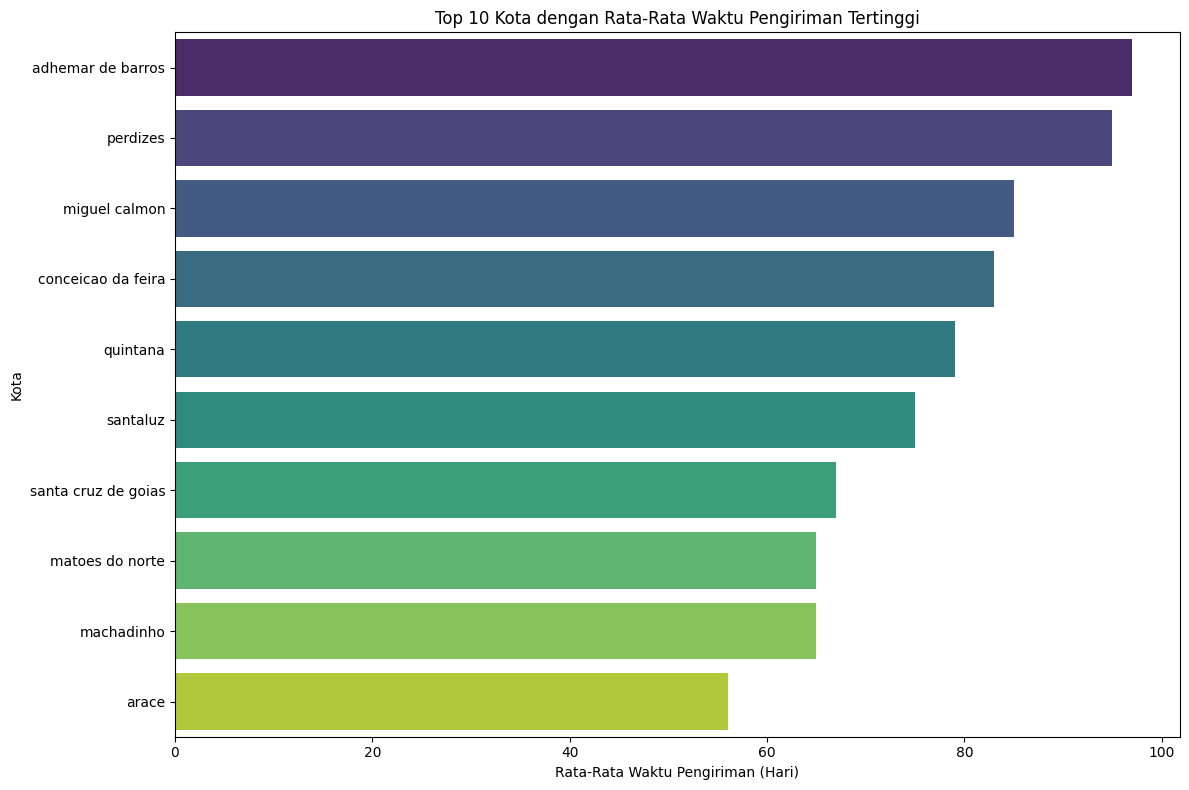

In [31]:
# Bar Plot Rata-Rata Waktu Pengiriman di Kota Teratas
plt.figure(figsize=(12, 8))
sns.barplot(data=top_delivery_cities, x='avg_delivery_duration', y='customer_city', palette='viridis')
plt.title('Top 10 Kota dengan Rata-Rata Waktu Pengiriman Tertinggi')
plt.xlabel('Rata-Rata Waktu Pengiriman (Hari)')
plt.ylabel('Kota')
plt.tight_layout()
plt.savefig('top_cities_delivery.png')
plt.show()

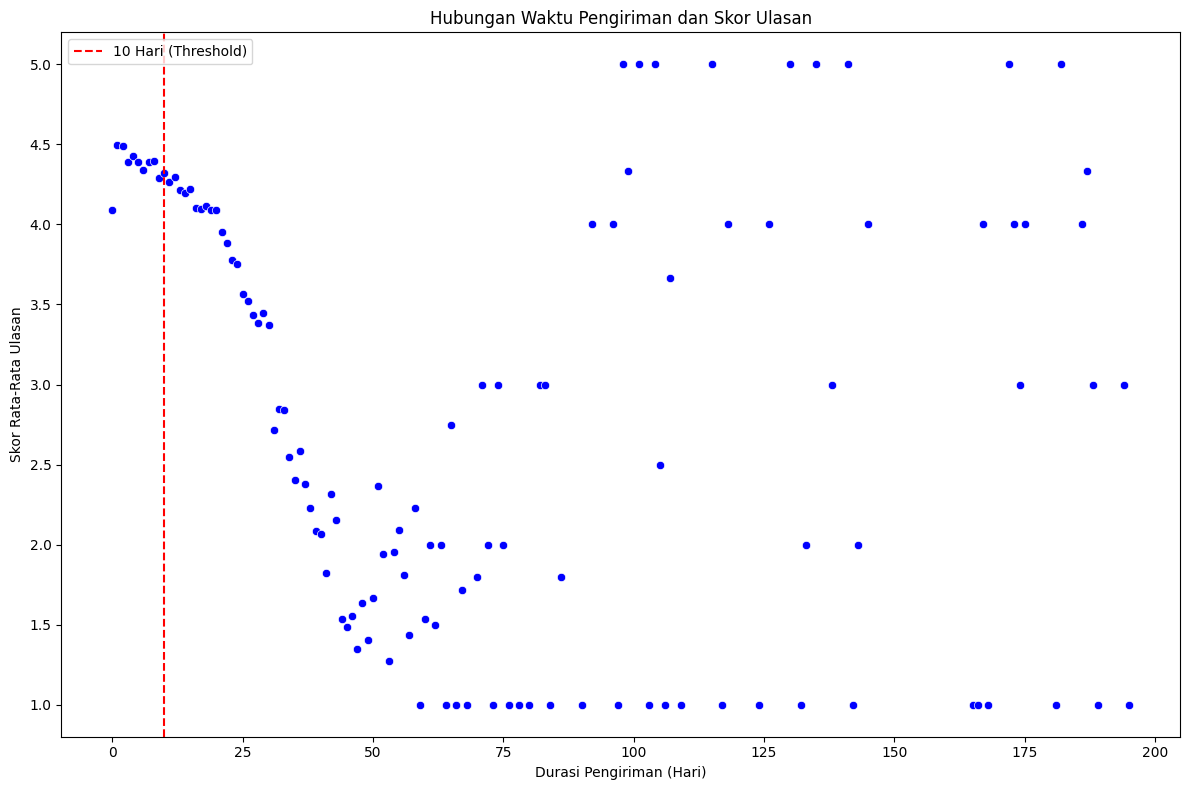

In [32]:
# Scatter Plot Hubungan Waktu Pengiriman dan Skor Ulasan
plt.figure(figsize=(12, 8))
sns.scatterplot(data=review_stats, x='delivery_duration', y='review_score', color='blue')
plt.axvline(x=10, color='red', linestyle='--', label='10 Hari (Threshold)')
plt.title('Hubungan Waktu Pengiriman dan Skor Ulasan')
plt.xlabel('Durasi Pengiriman (Hari)')
plt.ylabel('Skor Rata-Rata Ulasan')
plt.legend()
plt.tight_layout()
plt.savefig('delivery_vs_review.png')
plt.show()

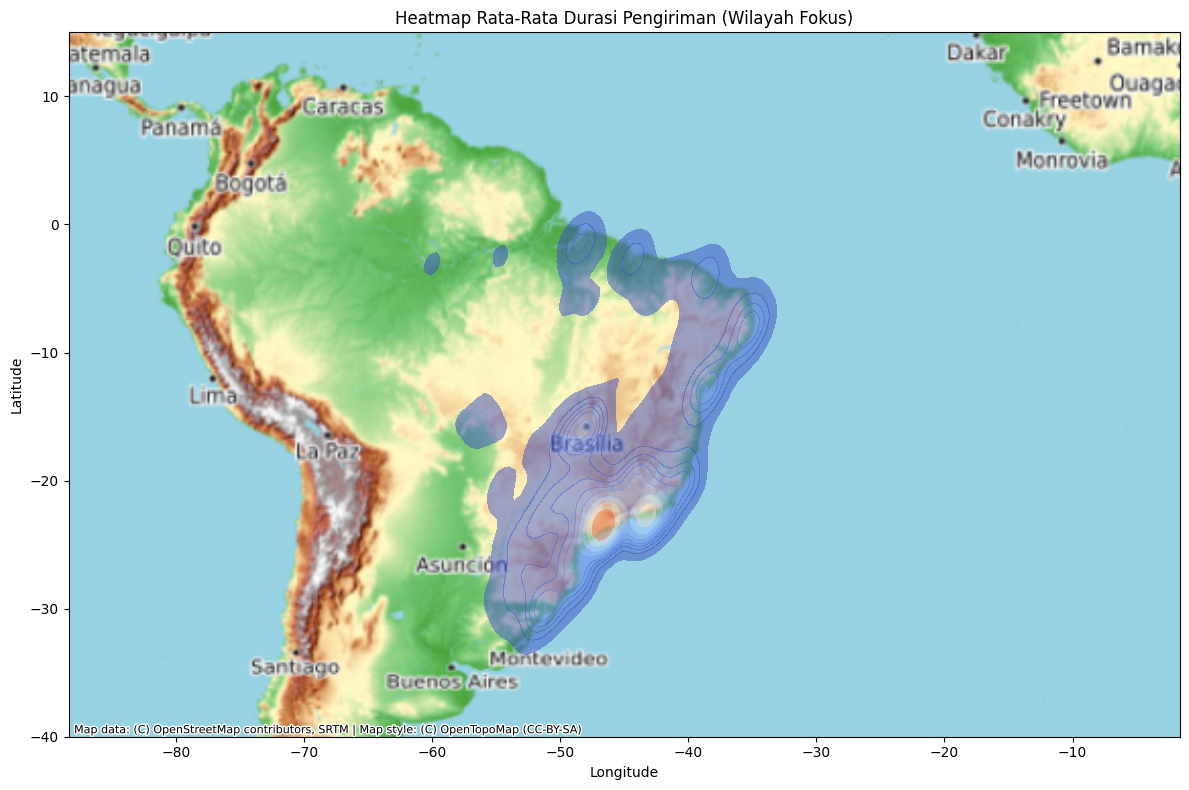

In [33]:
# Plot Heatmap
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=data_q1_cleaned,
    x='geolocation_lng',
    y='geolocation_lat',
    weights=data_q1_cleaned['delivery_duration'],
    cmap='coolwarm',
    fill=True,
    alpha=0.5
)

# Menambahkan peta dasar
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenTopoMap)

# Memperbesar tampilan sesuai fokus (Brasil dan sekitarnya)
ax.set_xlim([-65, -25])  # Rentang longitude
ax.set_ylim([-40, 15])   # Rentang latitude

# Atur rasio aspek
ax.set_aspect('equal', adjustable='datalim')  # Rasio latitude dan longitude sama

# Tambahkan judul dan label
plt.title('Heatmap Rata-Rata Durasi Pengiriman (Wilayah Fokus)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Simpan dan tampilkan
plt.savefig('delivery_heatmap.png')
plt.show()

**Insight:**
- Top 10 Kota dengan Rata-Rata Waktu Pengiriman Tertinggi

  * Adhemar de Barros Memiliki Waktu Pengiriman Tertinggi: Kota ini memiliki rata-rata waktu pengiriman tertinggi, lebih dari 95 hari. Ini menandakan perlunya investigasi lebih lanjut mengenai alasan di balik lamanya waktu pengiriman di kota ini.

  * Perdizes Mengikuti di Posisi Kedua: Perdizes menempati posisi kedua dengan rata-rata waktu pengiriman mendekati 95 hari. Ini juga perlu menjadi perhatian, meski sedikit lebih baik dari Adhemar de Barros.

  * Perbedaan yang Signifikan dengan Bagian Bawah Daftar: Perbedaan waktu pengiriman antara dua kota teratas dan kota-kota di bagian bawah daftar cukup besar. Kota-kota seperti Arace, Machadinho, dan Matoes do Norte memiliki waktu pengiriman yang jauh lebih singkat, sekitar 55-65 hari.

  * Tren Gradien Warna: Penggunaan warna dengan gradasi dari kuning muda ke ungu tua membantu memvisualisasikan perbedaan. Kota dengan waktu pengiriman lebih lama digambarkan dengan warna yang lebih gelap.

- Hubungan Waktu Pengiriman dan Skor Ulasan
  * Korelasi Negatif Awal: Terdapat tren korelasi negatif yang kuat pada awalnya. Ketika durasi pengiriman meningkat dari 0 hingga sekitar 40 hari, skor rata-rata ulasan cenderung menurun secara signifikan. Ini mengindikasikan bahwa pelanggan sangat tidak puas dengan waktu pengiriman yang lama.

  * Threshold 10 Hari: Garis merah vertikal pada 10 hari bertindak sebagai threshold. Sebagian besar skor ulasan yang tinggi (di atas 4.0) terkonsentrasi di area sebelah kiri garis (durasi pengiriman di bawah 10 hari). Ini mengkonfirmasi bahwa 10 hari adalah ambang batas yang penting bagi pelanggan.

  * Penyebaran Skor Ulasan di Atas 40 Hari: Setelah 40 hari, penyebaran skor ulasan sangat lebar, tetapi didominasi oleh skor rendah. Ada sejumlah kecil ulasan dengan skor tinggi, tetapi sebagian besar skor berada di antara 1.0 hingga 3.0. Hal ini bisa berarti, meskipun ada pelanggan yang masih bisa mentoleransi waktu pengiriman yang sangat lama, secara umum mereka tidak puas.

  * Banyak Data dengan Skor Rendah dan Durasi Pengiriman Lama: Terdapat banyak data yang memiliki durasi pengiriman sangat lama (di atas 50 hari) dan skor ulasan yang sangat rendah (1.0). Hal ini menunjukkan bahwa sebagian besar pelanggan sangat tidak puas ketika pengiriman membutuhkan waktu lebih dari 50 hari.
- Heatmap Rata-Rata Durasi Pengiriman (Wilayah Fokus) - **ANALISIS LANJUTAN**
    * Fokus Area Brazil: Heatmap ini berfokus pada wilayah Brazil bagian timur, dengan kontur yang jelas menggambarkan variasi durasi pengiriman di area tersebut. Area lain di peta ditampilkan sebagai konteks geografis.

    * Pola Kontur: Garis kontur berwarna biru tua hingga muda mengindikasikan berbagai tingkat durasi pengiriman. Semakin padat dan dalam warna konturnya, semakin tinggi rata-rata durasi pengiriman di area tersebut.

    * Pusat Durasi Pengiriman Tertinggi: Terdapat satu area dengan warna merah di bagian timur Brazil, menunjukkan rata-rata durasi pengiriman yang paling tinggi. Area ini terlihat seperti pusat dari area yang lebih luas dengan rata-rata durasi pengiriman yang relatif tinggi.

    * Wilayah dengan Durasi Pengiriman Lebih Cepat: Area di luar wilayah kontur biru, seperti bagian barat Brazil, menunjukkan bahwa durasi pengiriman di area tersebut lebih singkat jika dibandingkan dengan wilayah timur.

    * Penyebaran Gradual Durasi Pengiriman: Dari pusat area merah dengan durasi tertinggi, rata-rata durasi pengiriman menurun secara bertahap menuju pinggiran area kontur biru. Hal ini terlihat dari kontur yang semakin renggang dan warna yang semakin pudar.

    * Perbedaan Durasi Pengiriman di Sekitar Brasilia: Di dekat kota Brasilia, kontur warna menunjukkan bahwa rata-rata durasi pengiriman lebih tinggi di wilayah timur daripada wilayah baratnya.

    * Pengaruh Lokasi Geografis: Pola kontur menunjukkan bahwa ada faktor geografis yang mempengaruhi durasi pengiriman. Wilayah timur Brazil mungkin memiliki masalah infrastruktur, logistik, atau jarak yang menyebabkan rata-rata durasi pengiriman lebih lama.

    * Persebaran Area Durasi Tertinggi: Area dengan durasi tertinggi terlihat terpusat di wilayah timur Brazil dan meluas ke arah selatan. Area ini mungkin memerlukan perhatian khusus dalam hal peningkatan logistik dan efisiensi pengiriman.

### Pertanyaan 2:

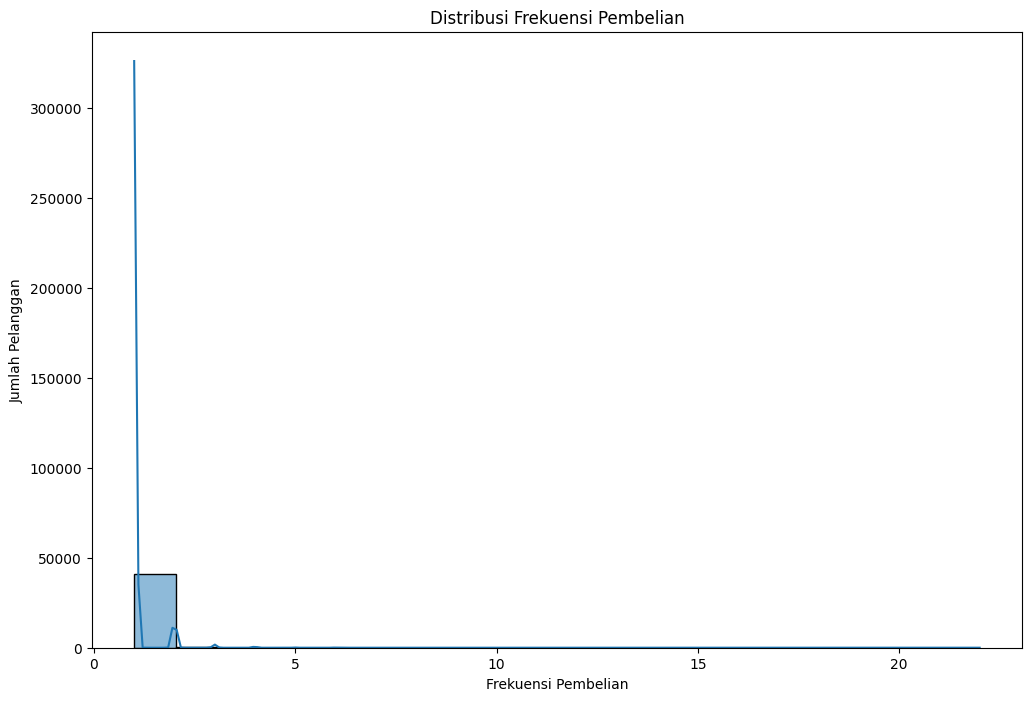

In [34]:
# Distribusi Frekuensi Pembelian
plt.figure(figsize=(12, 8))
sns.histplot(rfm['frequency'], bins=20, kde=True)
plt.title('Distribusi Frekuensi Pembelian')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

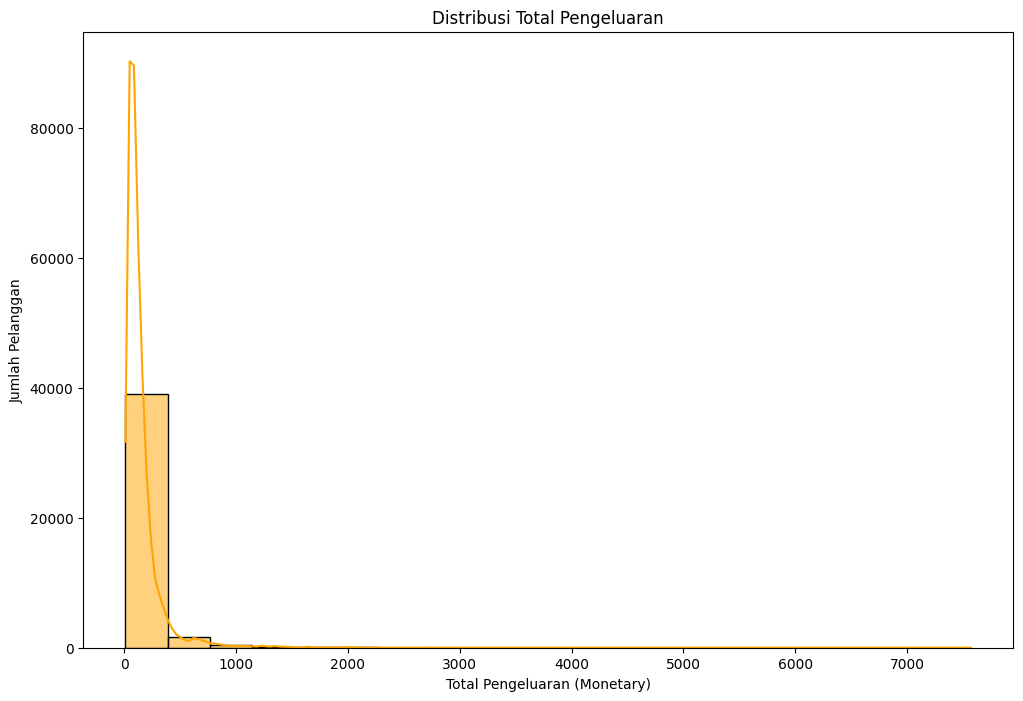

In [35]:
# Distribusi Total Pengeluaran
plt.figure(figsize=(12, 8))
sns.histplot(rfm['monetary'], bins=20, kde=True, color='orange')
plt.title('Distribusi Total Pengeluaran')
plt.xlabel('Total Pengeluaran (Monetary)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

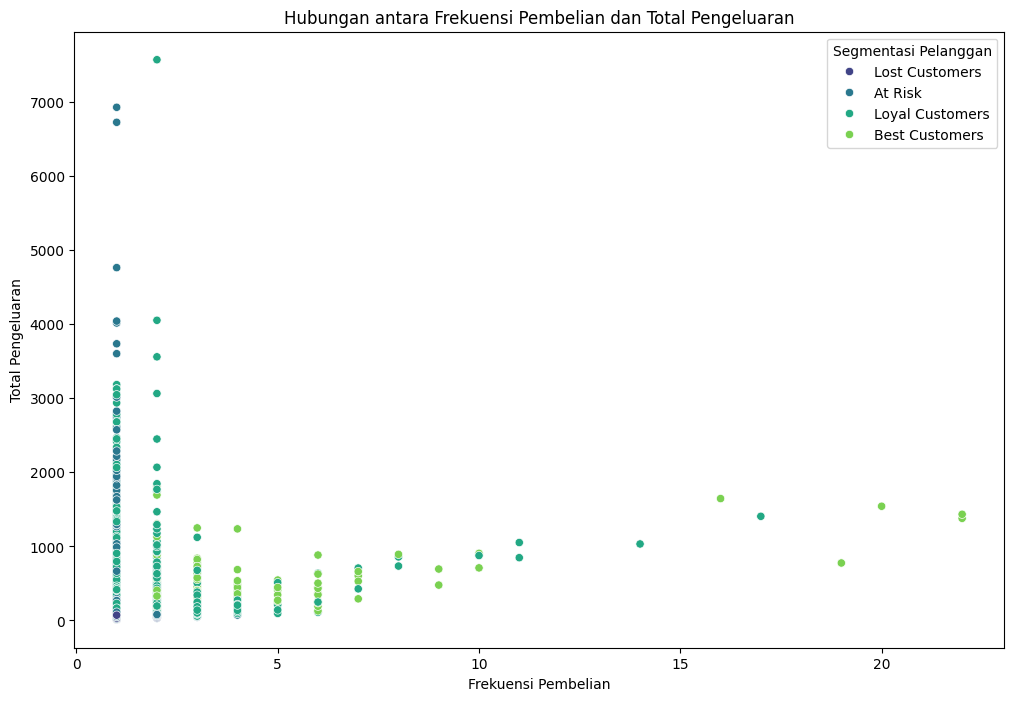

In [36]:
# Hubungan antara Frekuensi dan Total Pengeluaran
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='frequency', y='monetary', hue='segment', palette='viridis')
plt.title('Hubungan antara Frekuensi Pembelian dan Total Pengeluaran')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Total Pengeluaran')
plt.legend(title='Segmentasi Pelanggan')
plt.show()

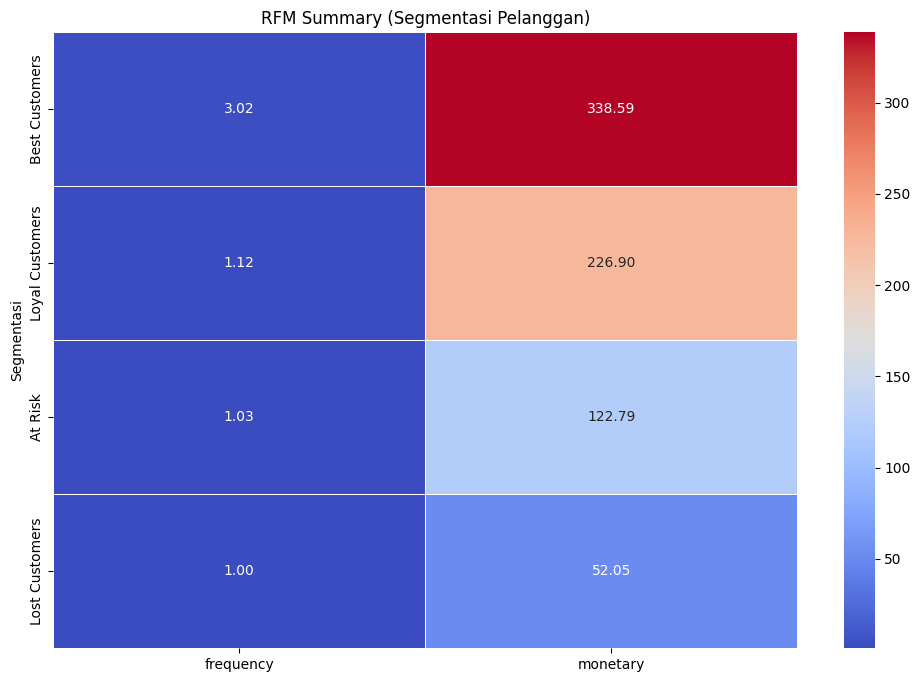

In [37]:
# Segmentasi Pelanggan (RFM Heatmap)
rfm_summary = rfm.groupby('segment').agg({
    'customer_unique_id': 'count',
    'frequency': 'mean',
    'monetary': 'mean'
}).sort_values(by='monetary', ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(rfm_summary[['frequency', 'monetary']], annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('RFM Summary (Segmentasi Pelanggan)')
plt.ylabel('Segmentasi')
plt.show()

**Insight:**
- Distribusi Frekuensi Pembelian
  * Distribusi Sangat Miring: Distribusi frekuensi pembelian sangat miring ke kanan (positively skewed). Sebagian besar pelanggan melakukan pembelian dengan frekuensi yang sangat rendah, dan hanya sebagian kecil yang melakukan pembelian berulang kali.

  * Puncak pada Frekuensi 1: Histogram memiliki puncak tertinggi pada frekuensi pembelian 1, menunjukkan bahwa sebagian besar pelanggan hanya melakukan pembelian satu kali. Ini terlihat dari bar yang sangat tinggi di angka 1.

  * Penurunan Cepat Frekuensi Pembelian: Frekuensi pembelian menurun dengan sangat cepat setelah angka 1. Hanya ada beberapa pelanggan yang melakukan pembelian 2 atau 3 kali, dan sangat sedikit yang melakukan lebih dari 3 pembelian.

  * Dominasi Pelanggan dengan Satu Pembelian: Jumlah pelanggan yang hanya melakukan satu kali pembelian jauh lebih besar dibandingkan dengan jumlah pelanggan dengan frekuensi pembelian lainnya. Ini terlihat jelas dari ketinggian bar pertama yang sangat signifikan dibanding bar lainnya.

  * Sedikit Pelanggan yang Melakukan Pembelian Berulang: Jumlah pelanggan yang melakukan lebih dari satu kali pembelian (frekuensi 2 atau lebih) sangat kecil. Ini mengindikasikan bahwa perusahaan menghadapi tantangan dalam mempertahankan pelanggan.

  * Pola 'Ekor Panjang': Distribusi ini memiliki pola "ekor panjang", di mana ada beberapa pelanggan yang melakukan pembelian dengan frekuensi sangat tinggi, tetapi jumlahnya sangat sedikit.

  * Fokus pada Pelanggan Baru: Distribusi ini menegaskan bahwa mayoritas pelanggan adalah pelanggan baru yang belum melakukan pembelian berulang.
- Distribusi Total Pengeluaran
  * Distribusi Miring ke Kanan: Distribusi total pengeluaran pelanggan sangat miring ke kanan (positively skewed). Ini menunjukkan bahwa sebagian besar pelanggan memiliki total pengeluaran yang relatif rendah, dan hanya sebagian kecil yang memiliki total pengeluaran yang sangat tinggi.

  * Puncak pada Pengeluaran Rendah: Histogram memiliki puncak yang sangat tinggi pada total pengeluaran yang rendah, yang menunjukkan bahwa sebagian besar pelanggan menghabiskan sedikit uang. Ini ditunjukkan oleh bar oranye yang paling tinggi di sisi kiri grafik.

  * Penurunan Cepat: Total pengeluaran menurun dengan cepat setelah titik puncak, dan sedikit sekali pelanggan yang memiliki total pengeluaran yang tinggi.

  * Dominasi Pelanggan dengan Pengeluaran Rendah: Jumlah pelanggan yang memiliki total pengeluaran rendah (berada pada bar pertama) jauh lebih banyak dibandingkan dengan jumlah pelanggan dengan total pengeluaran yang lebih tinggi. Ini menunjukkan bahwa mayoritas pelanggan memiliki total pengeluaran yang relatif kecil.

  * Sedikit Pelanggan dengan Pengeluaran Tinggi: Jumlah pelanggan yang memiliki total pengeluaran yang tinggi (berada di bar-bar selanjutnya) sangat sedikit. Ini mengindikasikan bahwa sebagian besar pendapatan perusahaan mungkin bergantung pada sejumlah kecil pelanggan yang melakukan pembelian dalam jumlah besar.

  * Pola "Ekor Panjang": Distribusi ini memiliki pola "ekor panjang", yang berarti ada beberapa pelanggan yang memiliki total pengeluaran sangat tinggi, tetapi jumlah mereka sangat sedikit.

  * Rentang Pengeluaran yang Luas: Total pengeluaran pelanggan bervariasi dari nilai yang rendah (mendekati 0) hingga nilai yang tinggi (lebih dari 7000).
- Hubungan antara Frekuensi Pembelian dan Total Pengeluaran
  * Korelasi Positif: Secara umum, terlihat korelasi positif antara frekuensi pembelian dan total pengeluaran. Pelanggan dengan frekuensi pembelian yang lebih tinggi cenderung memiliki total pengeluaran yang lebih tinggi juga.

  * Pengelompokan Berdasarkan Segmen: Scatter plot ini mengelompokkan pelanggan ke dalam empat segmen berdasarkan warna: "Lost Customers" (biru tua), "At Risk" (biru), "Loyal Customers" (hijau kebiruan), dan "Best Customers" (hijau kekuningan).

  * Penyebaran Data: Data tersebar cukup luas, dengan sebagian besar titik terkonsentrasi pada frekuensi pembelian rendah (1 hingga 5) dan total pengeluaran rendah hingga menengah.

  * Lost Customers: Pelanggan "Lost Customers" (biru tua) umumnya memiliki frekuensi pembelian 1 dan total pengeluaran yang rendah, yang menandakan bahwa mereka jarang membeli dan menghabiskan sedikit uang.

  * At Risk: Pelanggan "At Risk" (biru) memiliki frekuensi pembelian yang sedikit lebih tinggi dibandingkan "Lost Customers", tetapi total pengeluaran mereka bervariasi. Ini menunjukkan bahwa mereka berpotensi untuk melakukan pembelian lebih banyak, tetapi riskan untuk kehilangan mereka jika tidak ada upaya khusus.

  * Loyal Customers: Pelanggan "Loyal Customers" (hijau kebiruan) umumnya memiliki frekuensi pembelian yang lebih tinggi (mulai dari 2 hingga 10) dan total pengeluaran yang cenderung lebih tinggi dari pelanggan "Lost" dan "At Risk". Kelompok ini menunjukkan bahwa mereka secara rutin melakukan pembelian dan berpotensi menjadi pelanggan terbaik.

  * Best Customers: Pelanggan "Best Customers" (hijau kekuningan) memiliki frekuensi pembelian dan total pengeluaran yang paling tinggi. Mereka secara jelas adalah pelanggan dengan nilai tertinggi bagi perusahaan.

  * Outlier: Terdapat beberapa outlier dengan total pengeluaran yang sangat tinggi pada frekuensi pembelian yang rendah. Ini bisa berarti ada beberapa pelanggan yang melakukan pembelian dalam jumlah besar, tetapi tidak sering.
- Segmentasi Pelanggan (RFM Heatmap) - ANALISIS LANJUTAN
  * RFM Summary: Heatmap ini menyajikan ringkasan nilai RFM untuk setiap segmen pelanggan. Nilai yang ditampilkan adalah rata-rata untuk setiap metrik, yaitu Frequency (frekuensi pembelian) dan Monetary (total pengeluaran).

  * Segmentasi Pelanggan: Pelanggan dibagi menjadi empat segmen: "Best Customers", "Loyal Customers", "At Risk", dan "Lost Customers", sesuai dengan nilai RFM mereka.

  * Skala Warna: Heatmap menggunakan skala warna untuk memvisualisasikan nilai-nilai metrik RFM. Warna merah menunjukkan nilai yang lebih tinggi, sedangkan warna biru menunjukkan nilai yang lebih rendah.

  * Best Customers: Segmen "Best Customers" memiliki nilai rata-rata frekuensi pembelian tertinggi (3.02) dan nilai rata-rata total pengeluaran tertinggi (338.59). Ini menunjukkan bahwa pelanggan di segmen ini sering melakukan pembelian dan menghabiskan uang paling banyak.

  * Loyal Customers: Segmen "Loyal Customers" memiliki nilai rata-rata frekuensi pembelian yang lebih rendah (1.12) dibandingkan "Best Customers", tetapi nilai rata-rata total pengeluaran mereka cukup tinggi (226.90). Ini menunjukkan bahwa pelanggan di segmen ini cukup sering melakukan pembelian dan menghabiskan uang dalam jumlah yang signifikan.

  * At Risk: Segmen "At Risk" memiliki nilai rata-rata frekuensi pembelian yang rendah (1.03) dan nilai rata-rata total pengeluaran yang rendah (122.79) dibandingkan dua segmen sebelumnya. Ini menunjukkan bahwa pelanggan di segmen ini jarang melakukan pembelian dan menghabiskan uang yang relatif sedikit. Mereka juga berisiko untuk hilang.

  * Lost Customers: Segmen "Lost Customers" memiliki nilai rata-rata frekuensi pembelian paling rendah (1.00) dan nilai rata-rata total pengeluaran paling rendah (52.05). Ini menunjukkan bahwa pelanggan di segmen ini sangat jarang melakukan pembelian dan menghabiskan uang sangat sedikit.

### Pertanyaan 3:

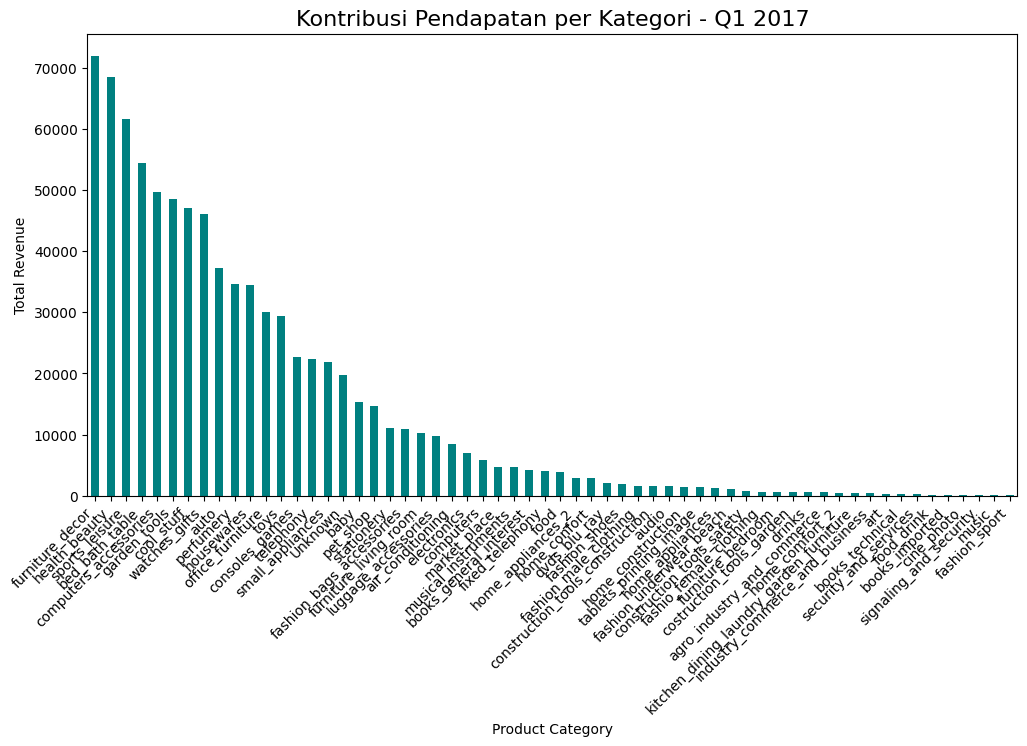

In [38]:
# Visualisasi kontribusi pendapatan
plt.figure(figsize=(12, 6))
revenue_per_category.plot(kind='bar', color='teal')
plt.title('Kontribusi Pendapatan per Kategori - Q1 2017', fontsize=16)
plt.ylabel('Total Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.show()

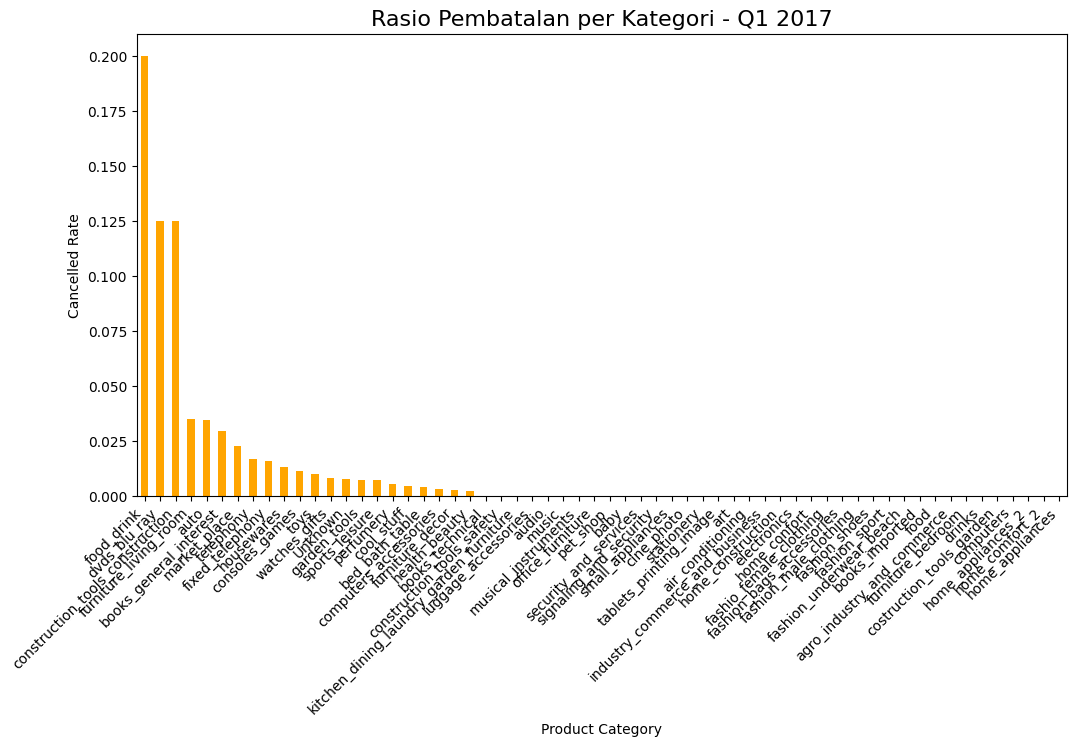

In [39]:
# Visualisasi rasio pembatalan
plt.figure(figsize=(12, 6))
cancel_rate_per_category.plot(kind='bar', color='orange')
plt.title('Rasio Pembatalan per Kategori - Q1 2017', fontsize=16)
plt.ylabel('Cancelled Rate')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight:**
- Kontribusi Pendapatan per Kategori - Q1 2017
  * Kontribusi Pendapatan per Kategori: Bar chart ini menyajikan total pendapatan yang dihasilkan oleh masing-masing kategori produk selama kuartal pertama tahun 2017.

  * Urutan Kategori: Kategori produk diurutkan berdasarkan total pendapatan, dari tertinggi ke terendah.

  * Perbandingan Antar Kategori: Visualisasi ini memudahkan perbandingan langsung antara kontribusi pendapatan masing-masing kategori produk.

  * Dominasi Kategori "furniture_decor": Kategori "furniture_decor" (furnitur dan dekorasi) memberikan kontribusi pendapatan tertinggi, jauh melebihi kategori lainnya. Ini menunjukkan bahwa kategori ini merupakan sumber pendapatan utama bagi perusahaan.

  * Kategori "health_beauty" dan "sports_leisure" Menyusul: Setelah kategori "furniture_decor", kategori "health_beauty" (kesehatan dan kecantikan) dan "sports_leisure" (olahraga dan rekreasi) memberikan kontribusi pendapatan yang signifikan.

  * Penurunan Pendapatan yang Gradual: Terlihat penurunan pendapatan yang cukup gradual seiring dengan penurunan bar dari kiri ke kanan. Ini mengindikasikan bahwa banyak kategori yang menghasilkan pendapatan, tetapi jumlahnya berbeda signifikan antar kategori.

  * Kategori dengan Pendapatan Sangat Rendah: Ada sejumlah kategori produk dengan kontribusi pendapatan yang sangat rendah, yang bar-nya hampir tidak terlihat di bagian kanan grafik. Beberapa kategori tersebut termasuk "signaling_and_security", "books_imported" dan "fashion_sport".
- Rasio Pembatalan per Kategori - Q1 2017
  * Rasio Pembatalan per Kategori: Bar chart ini menyajikan rasio pembatalan pesanan untuk setiap kategori produk selama kuartal pertama tahun 2017. Rasio pembatalan dihitung sebagai persentase pesanan yang dibatalkan dari total pesanan untuk setiap kategori.

  * Urutan Kategori: Kategori produk diurutkan berdasarkan rasio pembatalan, dari tertinggi ke terendah.

  * Perbandingan Antar Kategori: Visualisasi ini memudahkan perbandingan langsung antara rasio pembatalan masing-masing kategori produk.

  * Rasio Pembatalan Tertinggi pada Kategori "food_drink" dan "construction_tools": Kategori "food_drink" (makanan dan minuman) dan "construction_tools" (peralatan konstruksi) memiliki rasio pembatalan tertinggi, yang mengindikasikan bahwa sejumlah besar pesanan di kategori ini dibatalkan.

  * Penurunan Tajam pada Rasio Pembatalan: Terlihat penurunan tajam rasio pembatalan setelah beberapa kategori pertama, dan kemudian penurunan yang lebih gradual. Ini menandakan bahwa sejumlah kecil kategori memiliki rasio pembatalan yang jauh lebih tinggi dari kategori lainnya.

  * Kategori dengan Rasio Pembatalan Rendah: Sebagian besar kategori memiliki rasio pembatalan yang sangat rendah, ditandai dengan bar yang sangat pendek di bagian kanan grafik.

  * Banyak Kategori dengan Rasio Pembatalan di Bawah 0.05: Kebanyakan kategori memiliki rasio pembatalan di bawah 0.05 atau 5%.

## Analisis Lanjutan

In [40]:
# Kode ada pada Visualization & Explanatory Analysis

## Conclusion

- Conclusion pertanyaan 1

Analisis waktu pengiriman pada tahun 2017 mengungkapkan bahwa beberapa kota, khususnya Adhemar de Barros dan Perdizes, mengalami keterlambatan pengiriman yang signifikan dengan durasi lebih dari 10 hari. Hal ini berpotensi menurunkan kepuasan pelanggan dan memerlukan investigasi mendalam terhadap faktor-faktor penyebab keterlambatan, seperti infrastruktur, sistem logistik, dan efisiensi operasional. Perusahaan perlu segera mengembangkan strategi untuk mempercepat waktu pengiriman dan memastikan komunikasi transparan dengan pelanggan guna meminimalisir dampak negatif pada pengalaman pelanggan.

- Conclusion pertanyaan 2

Pola pembelian pelanggan pada tahun 2017 menunjukkan tantangan signifikan dalam retensi, dengan mayoritas pelanggan hanya melakukan satu kali pembelian. Meskipun demikian, terdapat sekelompok kecil pelanggan dengan total pengeluaran tinggi yang memberikan kontribusi pendapatan yang sangat berarti. Berdasarkan hal tersebut, perusahaan perlu mengembangkan strategi segmentasi pelanggan yang komprehensif, fokus pada konversi pelanggan satu kali menjadi pelanggan berulang, serta merancang program loyalitas dan pendekatan yang disesuaikan untuk setiap kategori pelanggan guna meningkatkan retensi dan nilai pelanggan.

- Conclusion pertanyaan 3

Dalam konteks kinerja kategori produk pada kuartal pertama 2017, kategori "furniture_decor", "health_beauty", dan "sports_leisure" terbukti menjadi kontributor pendapatan utama. Namun, terdapat kekurangan signifikan terkait tingkat pembatalan yang tinggi, terutama pada kategori "food_drink" dan "construction_tools". Perusahaan perlu melakukan evaluasi menyeluruh terhadap faktor-faktor penyebab pembatalan, seperti kualitas produk, ketersediaan stok, dan proses pemesanan, sambil secara simultan mengoptimalkan strategi pemasaran dan manajemen persediaan untuk kategori-kategori produk yang ada.